In [1]:
import numpy
from numpy import loadtxt, log10
import matplotlib as mpl
mpl.use('pdf')
import matplotlib.pyplot as plt
%matplotlib inline

lcurve =  (501, 8)


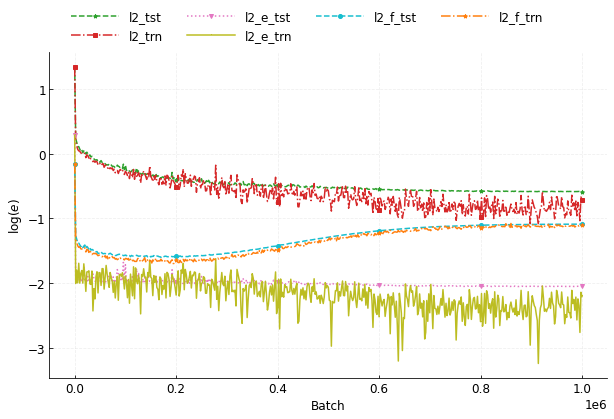

In [36]:
def get_ele(ls, idx):
    n = len(ls)
    return ls[idx%n]

def get_random_marker(i, marker_size=1, markevery=1000000):
    linestyle_list = ['solid', 'dashed', 'dashdot', 'dotted']
    marker_list    = ["o", "*", "s", "v", ","]
    color_list     = ["C1", "C2", "C3", "C6", "C8", "C9"]
    return dict(linestyle=get_ele(linestyle_list, i),
                marker=get_ele(marker_list, i),
                color=get_ele(color_list, i),
                markersize=marker_size,markevery=markevery)

energy_test = loadtxt("../../work/machine_learning_example_1/test/test.e.out")
lcurve      = loadtxt("../../work/machine_learning_example_1/train/lcurve.out")[0::20,:]
ibatch      = lcurve[:,0]
print("lcurve = ", lcurve.shape)
params = {
        "font.size": 12,    
        "axes.titlesize":12,   
        "axes.labelsize": 12, 
        "legend.fontsize": 12, 
        "xtick.labelsize": 12, 
        "ytick.labelsize": 12, 
        "figure.subplot.wspace":0.2, 
        "figure.subplot.hspace":0.4,
        "axes.spines.right":False,
        "axes.spines.top":False, 
        "xtick.direction":'in',
        "ytick.direction":'in'
}

mpl.rcParams.update(params)

style_dict = {
    'l2_tst':get_random_marker(1, marker_size=4, markevery=100),
    'l2_trn':get_random_marker(2, marker_size=4, markevery=100),
    'l2_e_tst':get_random_marker(3, marker_size=4, markevery=100),
    'l2_e_trn':get_random_marker(4, marker_size=4, markevery=100),
    'l2_f_tst':get_random_marker(5, marker_size=4, markevery=100),
    'l2_f_trn':get_random_marker(6, marker_size=4, markevery=100),
    'lr':get_random_marker(7, marker_size=4, markevery=100)
}

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ibatch, log10(lcurve[:,1]), **style_dict['l2_tst'])
ax.plot(ibatch, log10(lcurve[:,2]), **style_dict['l2_trn'])
ax.plot(ibatch, log10(lcurve[:,3]), **style_dict['l2_e_tst'])
ax.plot(ibatch, log10(lcurve[:,4]), **style_dict['l2_e_trn'])
ax.plot(ibatch, log10(lcurve[:,5]), **style_dict['l2_f_tst'])
ax.plot(ibatch, log10(lcurve[:,6]), **style_dict['l2_f_trn'])
# ax.plot(ibatch, log10(lcurve[:,7]), **style_dict['lr'])

props = {
      'xlabel': 'Batch', 
      'ylabel': r'log$(e)$'}
ax.set(**props)

ax.grid(linestyle="--", alpha=0.2)

fig.legend(('l2_tst','l2_trn','l2_e_tst','l2_e_trn','l2_f_tst','l2_f_trn','lr'),frameon=False, loc='upper center',ncol=4,handlelength=4)

m =     0.616724, b =     0.019404


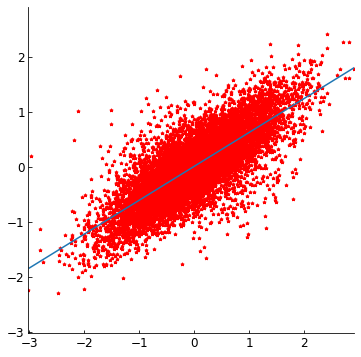

In [37]:
fig, axs = plt.subplots(1, 1,figsize=(10,6))
data1 = energy_test[:,0]-numpy.average(energy_test[:,0])
data2 = energy_test[:,1]-numpy.average(energy_test[:,0])
axs.scatter(data1, data2, marker='*', color='r', s=10)
lo = numpy.min([numpy.min(energy_test[:,0]-numpy.average(energy_test[:,0])), numpy.min(energy_test[:,1]-numpy.average(energy_test[:,0]))])
hi = numpy.max([numpy.max(energy_test[:,0]-numpy.average(energy_test[:,0])), numpy.max(energy_test[:,1]-numpy.average(energy_test[:,0]))])
axs.set_xlim(lo, hi)
axs.set_ylim(lo, hi)
axs.set_aspect(1.0)

m,b = numpy.polyfit(data1, data2, 1)
print("m = %12.6f, b = %12.6f"%(m, b))
x = numpy.linspace(-3, 3, 100)
axs.plot(x, m*x+b)

In [38]:
numpy.std(data1-data2)

0.4986428395694806